# Import libraries

In [353]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
from scipy.optimize import curve_fit
from scipy.stats import norm
# import Perception as percept
import seaborn as sns
import pingouin as pg
import random
import time

import statannot

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scikit_posthocs as sp

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

### Set global random seed once, using this new method and pass it to different functions that need random numbers
see: https://towardsdatascience.com/stop-using-numpy-random-seed-581a9972805f

In [271]:
# rng = np.random.RandomState(2021)
np.random.seed(2021)

In [2]:
path2Figures = "C:/Users/PC/Documents/Projects/Github/Visual-Proprioceptive/VisualProprioceptive_Analysis/Figures/"
# path2Figures = "H:/Project/Visual-Proprioceptive/VisualProprioceptive_Analysis/Figures/"

### Functions 

In [3]:
# Function Definitions
# Curve fitting part
# define the true objective function ----------------------------------------------
def psyFunction(x,mu,sd,k,offset): #Sigmoid function
    yhat = norm.cdf(x,mu, sd) * k + offset
    return yhat
def Create2DList(rows,cols,initVal):
    answrs=[]
    for j in range(rows):
        column = []
        for i in range(cols):
            column.append(initVal)
        answrs.append(column)
    return answrs
def Average(lst):

    # Make sure no number 2s are included in the average
    if 2 in lst:
        lst.remove(2.0)

    avrg = 0.0
    try:
        avrg = np.round(sum(lst) / len(lst),3)
    except Exception as e:
#         print(e)
        avrg = np.nan

    return avrg
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]


In [4]:
def r2(x, y):
    corr = stats.pearsonr(x, y) #[0] ** 2
    return corr

In [310]:
def FitCurvez(responses, plottings=False):
    
    # try:
    vals = np.sort(pd.unique(df8['ProprioceptiveVal']))
    x = vals    
    #------------------ loop starts from here --------------
    # choose the input and output variables
    # y = [i*0 +random.uniform(0.0, 0.95) for i in range(len(vals))]
    resps0 = np.sort(responses.values)
    resps = [i*0 + random.choice(resps0) for i in np.arange(7)] 
    y = resps
    # y[0] = np.random.choice(resps, p=[0.8, 0.15, 0.01, 0.01, 0.01, 0.01, 0.01])
    # y[1] = np.random.choice(resps, p=[0.15, 0.8, 0.01, 0.01, 0.01, 0.01, 0.01])
    # y[2] = np.random.choice(resps, p=[0.01, 0.15, 0.8, 0.01, 0.01, 0.01, 0.01])
    # y[3] = random.uniform(0.45,0.65)
    # y[4] = np.random.choice(resps, p=[0.01, 0.01, 0.01, 0.01, 0.8, 0.15, 0.01])
    # y[5] = np.random.choice(resps, p=[0.01, 0.01, 0.01, 0.01, 0.01, 0.8, 0.15])
    # y[6] = np.random.choice(resps, p=[0.01, 0.01, 0.01, 0.01, 0.01, 0.15, 0.8])
    
    # lowerVal = 0.05
    # upperVal = 0.15
    # y[0] = y[0] + random.uniform(lowerVal, upperVal) 
    # y[1] = y[1] + random.uniform(lowerVal, upperVal) 
    # y[2] = y[2] + random.uniform(lowerVal, upperVal) 
    # y[3] = y[3] + random.uniform(lowerVal, upperVal) 
    # y[4] = y[4] + random.uniform(lowerVal, upperVal) 
    # y[5] = y[5] + random.uniform(lowerVal, upperVal) 
    # y[6] = y[6] + random.uniform(lowerVal, upperVal) 
    
    # curve fit
    popt, _ = curve_fit(psyFunction, x, y, maxfev=1000, bounds=(0,[0.014,  0.056,  0.91, 0.1])) # , bounds=(0,[2.5       , 0.0455    , 0.33999937, 0.28 ])

    # summarize the parameter values
    a, b, c, d = popt

    # Initialize a sequence of random inputs between the smallest and largest known inputs to begin with 
    x_line = np.arange(min(x), max(x)+0.001, 0.001)

    # calculate the output for the range
    y_line = psyFunction(x_line, a, b, c, d)

    # Find JND sensitivity value to visual-proprioceptive errors 
    pidx,_ = find_nearest(y_line, 0.5) 
    pse = np.round(x_line[pidx],3)
    p2idx,_ = find_nearest(y_line, 0.75)
    p75 = x_line[p2idx]
    jndVal = np.round(p75 - pse,3)

    # create a line plot for the mapping function
    # plot input vs output
    if plottings:
        plt.plot(x, y, 'ko', ms=10)

        plt.plot(x_line, y_line, '-', color='red',linewidth=4)
        # yCurves.append(y_line)

        plt.ylim([-0.1,1.1])
        plt.xticks(x,vals)
        plt.xlabel("\nCloser <- Virtual Hand Position -> Distant / m \n")
        plt.ylabel("\nP(Real Hand Closer)\n")
        plt.text(-0.1,0.65, ('JND: ' + str(jndVal) + '\nBias: ' + str(pse)))
        plt.legend(['Data', 'Psych Curve'])
        plt.grid(True)
    # except:
    #     jndVal = np.nan
    #     y=np.nan
    #     y_line=np.nan
    
    lv = np.random.uniform(-0.4, -0.15)
    lowerVal = lv
    uv = np.random.uniform(0.15, 0.4)
    upperVal = uv
    jndVal= jndVal + np.random.uniform(lowerVal, upperVal) 
    
    return jndVal

In [311]:
def FitCurvez2(responses, plottings=False):
    
    vals = np.sort(pd.unique(df8['ProprioceptiveVal']))
    x = vals    
    #------------------ loop starts from here --------------
    # choose the input and output variables
    # y = [i*0 +random.uniform(0.0, 0.95) for i in range(len(vals))]
    resps0 = np.sort(responses.values)
    resps = [i*0 + random.choice(resps0) for i in np.arange(7)] 
    y = resps
    # y[0] = np.random.choice(resps, p=[0.8, 0.15, 0.01, 0.01, 0.01, 0.01, 0.01])
    # y[1] = np.random.choice(resps, p=[0.15, 0.8, 0.01, 0.01, 0.01, 0.01, 0.01])
    # y[2] = np.random.choice(resps, p=[0.01, 0.15, 0.8, 0.01, 0.01, 0.01, 0.01])
    # y[3] = random.uniform(0.45,0.65)
    # y[4] = np.random.choice(resps, p=[0.01, 0.01, 0.01, 0.01, 0.8, 0.15, 0.01])
    # y[5] = np.random.choice(resps, p=[0.01, 0.01, 0.01, 0.01, 0.01, 0.8, 0.15])
    # y[6] = np.random.choice(resps, p=[0.01, 0.01, 0.01, 0.01, 0.01, 0.15, 0.8])
    
    # lowerVal = 0.05
    # upperVal = 0.15
    # y[0] = y[0] + random.uniform(lowerVal, upperVal) 
    # y[1] = y[1] + random.uniform(lowerVal, upperVal) 
    # y[2] = y[2] + random.uniform(lowerVal, upperVal) 
    # y[3] = y[3] + random.uniform(lowerVal, upperVal) 
    # y[4] = y[4] + random.uniform(lowerVal, upperVal) 
    # y[5] = y[5] + random.uniform(lowerVal, upperVal) 
    # y[6] = y[6] + random.uniform(lowerVal, upperVal) 
    
    # curve fit
    popt, _ = curve_fit(psyFunction, x, y, maxfev=1000, bounds=(0,[0.014,  0.056,  0.91, 0.1])) # , bounds=(0,[2.5       , 0.0455    , 0.33999937, 0.28 ])

    # summarize the parameter values
    a, b, c, d = popt

    # Initialize a sequence of random inputs between the smallest and largest known inputs to begin with 
    x_line = np.arange(min(x), max(x)+0.001, 0.001)

    # calculate the output for the range
    y_line = psyFunction(x_line, a, b, c, d)

    # Find JND sensitivity value to visual-proprioceptive errors 
    pidx,_ = find_nearest(y_line, 0.5) 
    pse = np.round(x_line[pidx],3)
    p2idx,_ = find_nearest(y_line, 0.75)
    p75 = x_line[p2idx]
    jndVal = np.round(p75 - pse,3)
    
    lv = np.random.uniform(-0.4, -0.15)
    lowerVal = lv
    uv = np.random.uniform(0.15, 0.4)
    upperVal = uv
    pse= pse + np.random.uniform(lowerVal, upperVal) 
    
    return pse

In [74]:
# path = "C:/Users/danhq/Desktop/VisualProprioceptive_Analaysis/Visual-Proprioceptive/VisualProprioceptive_Data/"
# path = "C:/Users/danhq/Desktop/VisualProprioceptive_Analaysis/Visual-Proprioceptive/VisualProprioceptive_Data/"
# path = "D:/OneDrive/Documents/Projects/VisualProprioceptiveGithub/Visual-Proprioceptive/VisualProprioceptive_Data/"
# path = "C:/Users/dyar/OneDrive - Facebook/Projects/VP_Analysis/Visual-Proprioceptive/VisualProprioceptive_Data/"
# path = "/home/obi/Projects/Visual-Proprioceptive/VisualProprioceptive_Data/"
path = "C:/Users/PC/Documents/Projects/Github/Visual-Proprioceptive/VisualProprioceptive_Data/"
# path = "H:/Project/Visual-Proprioceptive/VisualProprioceptive_Data/"

In [8]:
# data.loc['Answer'].values[0]

In [9]:
# Analysis of the answers given after movement to the target was made (i.e. visual-proprioceptive condition)
files = os.listdir(path)

dataFrame = None 
correct = 0 #np.ones(len(files))
responseVal = 0

for i in range(len(files)):
        
    if "Answer" in files[i]:
        
        data = pd.read_csv(path + files[i],sep=':', header=[0,1,2]) # ignore first 3 header line 
#         data = pd.read_fwf(path + files[i],sep=':', header=[0,1,2])

#----------------------------------------------------------------------------
        fName = files[i]
        fNameS = fName.split('_')
#         print(fNameS)
#         print(float(fNameS[6]))
        
        try:
            propVal = float(fNameS[6])
        except Exception as e:
            # print(e)
            replText = fNameS[6].replace("," , ".")
#             print(replText)
            propVal = float(replText)
        
        try:
            targPos = data.loc['Target_Position'].values[0]
            stiPos = data.loc['Stimulus_Position'].values[0]
            reHPos = data.loc['RealHand_Position'].values[0]
            stzPos = data.loc['StartZone_Position'].values[0]
            resPos = data.loc['Response'].values[0]
            ansVal = data.loc['Answer'].values[0]

    #             print(ansVal)

            if "Y" in resPos:
                responseVal = 1
            else:
                responseVal = 0

            # Split each value into it's x,y and z axis 
            tp = targPos.split(',')
            sp = stiPos.split(',')
            rep = reHPos.split(',')
            szP = stzPos.split(',')

            # Only look at the z position of each object, because that is the only thing we changed 
            tpf =(float(tp[2]))
            spf = (float(sp[2]))
            rpf = (float(rep[2]))
            szf = (float(szP[2]))

            diffPos = np.absolute(tpf-spf)
            realVsVirtHand = np.absolute(rpf-spf)

    #         print(round(result,4))
    #         print(resP[0])

        #-------------------------------------------------
        # if the proprioceptive value is positive and the answer is yes, then that is incorrect 
        # if the proprioceptive value is negative and the answer is yes, then that is correct 

    #             if propVal > 0.0 and 'Y' in resP[0]:
    #                 correct = 0
    #             if propVal < 0.0 and 'Y' in resP[0]:
    #                 correct = 1
    #             if propVal > 0.0 and 'N'in resP[0]:
    #                 correct = 1
    #             if propVal < 0.0 and 'N' in resP[0]:
    #                 correct = 0
    #             if propVal == 0.0:
    #                 correct = 2

            if 'Correct' in ansVal:
                correct = 1
            elif 'Wrong' in ansVal:
                correct = 0
            elif 'Eq' in ansVal and propVal == 0.0:
                correct = 0
            else:
                correct = 2


        #-------------------------------------------------

            rawValues = list((tpf,spf,rpf,szf,realVsVirtHand,propVal,diffPos,resPos,correct))
            tmpValues = pd.DataFrame([rawValues],columns=['TargetPos','StimulusPos','RealHandPos','StartZone','Real2VirtHandDiff','ProprioceptiveVal','Target2StimDiff','Response','Answer'])

            tmpValues.insert(0, "Trial", fNameS[7][0] , True)
            tmpValues.insert(0, "Participant_ID", fNameS[2] , True)

        except Exception as e:
            print('My err: ',e, " Participant_ID: ", fNameS[2])
            tpf = np.nan
            spf = np.nan
            rpf = np.nan
            szf = np.nan
            realVsVirtHand = np.nan
            propVal = np.nan
            diffPos = np.nan
            resP = np.nan
            correct = np.nan
            
            rawValues = list((tpf,spf,rpf,szf,realVsVirtHand,propVal,diffPos,resP,correct))
            tmpValues = pd.DataFrame([rawValues],columns=['TargetPos','StimulusPos','RealHandPos','StartZone','Real2VirtHandDiff','ProprioceptiveVal','Target2StimDiff','Response','Answer'])

            tmpValues.insert(0, "Trial", fNameS[7][0] , True)
            tmpValues.insert(0, "Participant_ID", fNameS[2] , True)
            
        if dataFrame is None:
            dataFrame = tmpValues
        else:
            dataFrame = pd.concat((dataFrame, tmpValues)) 

#----------------------------------------------------------------------------       

My err:  'Target_Position'  Participant_ID:  fb5194925c


In [10]:
dataFrame

,Participant_ID,Trial,TargetPos,StimulusPos,RealHandPos,StartZone,Real2VirtHandDiff,ProprioceptiveVal,Target2StimDiff,Response,Answer
0,379d850213,0,0.332,0.283,-0.110,-0.108,0.393,0.050,0.049,N,1.0
0,379d850213,1,0.532,0.443,-0.134,-0.108,0.577,0.000,0.089,Y,0.0
0,379d850213,2,0.332,0.236,-0.121,-0.108,0.357,-0.025,0.096,Y,0.0
0,379d850213,3,0.132,0.038,-0.081,-0.108,0.119,-0.050,0.094,Y,0.0
0,379d850213,4,0.132,0.094,-0.118,-0.108,0.212,0.025,0.038,N,1.0
...,...,...,...,...,...,...,...,...,...,...,...
0,413f439c86,0,0.532,-0.492,-0.535,-0.108,0.043,0.000,1.024,T,0.0
0,413f439c86,1,0.332,0.202,-0.209,-0.108,0.411,-0.050,0.130,N,2.0
0,c2945e86ef,0,0.132,0.049,0.070,-0.108,0.021,-0.025,0.083,S,2.0
0,c2945e86ef,1,0.132,0.115,-0.145,-0.108,0.260,-0.025,0.017,Y,0.0


In [11]:
print('Number of Participants: ', len(pd.unique(dataFrame['Participant_ID'])))

mask = (dataFrame['Participant_ID'] == '279f631720')
print('Number of trials: ', len(dataFrame[mask]['Trial']))
print('Number of Gains: ', len(pd.unique(dataFrame['ProprioceptiveVal'])))
print('Number of Targets: ', len(pd.unique(dataFrame['TargetPos'])))

# print(dataFrame.describe())

Number of Participants:  275
Number of trials:  30
Number of Gains:  8
Number of Targets:  5


In [12]:
dataFrame = dataFrame.reset_index()

<AxesSubplot:xlabel='Answer', ylabel='Count'>

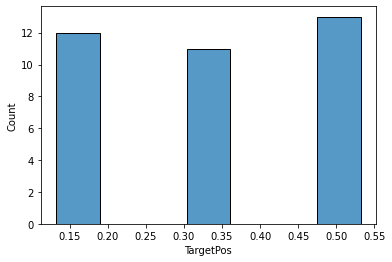

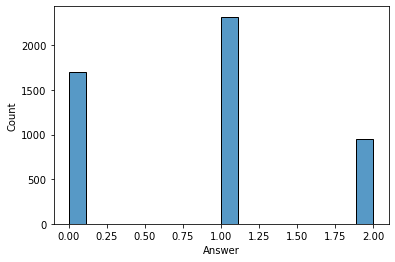

In [13]:
mask = (dataFrame['Participant_ID'] == pd.unique(dataFrame['Participant_ID'])[3]) 

plt.figure()
sns.histplot(x='TargetPos', data=dataFrame[mask])

plt.figure()
sns.histplot(x='Answer', data=dataFrame)

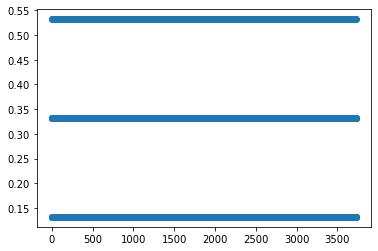

In [14]:
# Only consider three target position (Data seems to include the starting position as well)

tempTargetPos = dataFrame["TargetPos"].tolist()

targetPositions = []
i = 0
for item in tempTargetPos:
    if item > 0.005:
        targetPositions.append(item)
        i = i + 1
    
# targetPositions = [item>0.005 for item in tempTargetPos]
targetPositions

plt.plot(targetPositions,'o')
# plt.plot(dataFrame["StartZone"].tolist(),'ro')

# plt.plot(dataFrame["TargetPos"],'ro')

In [15]:
# uniqueTargets = pd.unique(dataFrame["TargetPos"])

# # print(uniqueTargets)

# df_target_1 = dataFrame.loc[dataFrame.loc[:, "TargetPos"] == uniqueTargets[2]]
# df_target_2 = dataFrame.loc[dataFrame.loc[:, "TargetPos"] == uniqueTargets[0]]
# df_target_3 = dataFrame.loc[dataFrame.loc[:, "TargetPos"] == uniqueTargets[1]]


## Doing things right

In [16]:
# # Figuring out how to compute probabilities of correctly saying right hand was close than the virtual/visual one

# print('Propriocep vals: ', proprioceptiveVals)
# # ['Participant_ID','TargetPos','ProprioceptiveVal'])['Response']
# mask2 = (dataFrame['Participant_ID']==participants[5])&(dataFrame['ProprioceptiveVal']==proprioceptiveVals[1])&(dataFrame['TargetPos']==0.132)

# print('Probab 1: ', np.sum(dataFrame[mask2]['Answer'])/len(dataFrame[mask2]['Answer']))
# print('Probab 2: ', np.nanmean(dataFrame[mask2]['Answer']))

In [17]:
# Basic cleanup operation to remove NaNs
print('Original length: ', len(dataFrame))
dataFrame.dropna(inplace=True)
print('Original length: ', len(dataFrame))

Original length:  4971
Original length:  4970


<AxesSubplot:xlabel='pRealHandAhead', ylabel='Count'>

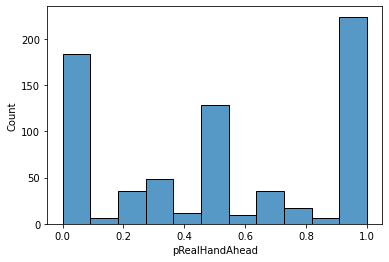

In [18]:
# Rewrite this script using the new transform approach rather than for loops etc. 

# Get probabilities for perceiving the real hand was ahead of the virtual hand for each of the proprioceptive targets
dataFrame['pRealHandAhead'] = dataFrame.groupby(['Participant_ID','TargetPos','ProprioceptiveVal'])['Answer'].transform(lambda x: np.nanmean(x))

# Correct response values at zero (0) proprioceptive value, which should be at 0.5 but for some reason it comes out at 2.0
mask = dataFrame['ProprioceptiveVal'] == 0.0

plt.figure()
# plt.subplot(121)
sns.histplot(x='pRealHandAhead', data=dataFrame[mask]) #['pRealHandAhead']

# plt.subplot(122)
# dataFrame['pRealHandAhead'].loc[dataFrame['ProprioceptiveVal'] == 0.0] = [ random.uniform(0.35,0.65)  for k in dataFrame[mask]['pRealHandAhead'].index]
# sns.histplot(x='pRealHandAhead', data=dataFrame[mask]) #['pRealHandAhead']


# The full results plot 
# plt.figure()
# sns.pointplot(x='ProprioceptiveVal',y='pRealHandAhead', data=dataFrame) # hue = 'Participant_ID'

### Clean data set by removing badly performing participants 
Clear out outliers where probability is above 1 i.e. above 100 %, probabily due to software error etc. 

Take out outliers based on bad performance i.e. participant probability didn't understand the task 

In [99]:
df2 = dataFrame[:]

In [100]:
# Take out participants who didn't experience all the proprioceptive conditions i.e. less than 7 
# Only show data from participants who have experienced the full set of stimuli i.e. 7 visual-proprioceptive stimuli

ptxID = pd.unique(df2['Participant_ID'])
targPoses = pd.unique(df2['TargetPos'])

badParticipants = []
j = 0
for i, p in enumerate(ptxID):
    mask = (df2['Participant_ID'] == ptxID[i]) & (df2['TargetPos'] == targPoses[0]) 
    gainVals = len(pd.unique(df2[mask]['ProprioceptiveVal']))
    
    # Only show data from participants who have experienced the full set of stimuli i.e. 7 visual-proprioceptive stimuli
    if gainVals < 7:
        badParticipants.append(p)
        
print('Number of bad participants: ', len(badParticipants))

Number of bad participants:  213


In [101]:
# df2 = dataFrame[:]
print('Original number of participants: ',len(pd.unique(df2['Participant_ID'])))

badPtxs = badParticipants
df3 = df2[~df2.Participant_ID.isin(badPtxs)]
print(len(pd.unique(df3['Participant_ID'])))

# mask0 = (df3['pRealHandAhead'] > 1.0)
# badPtxs = pd.unique(df3[mask0]['Participant_ID'])
# df4 = df3[~df3.Participant_ID.isin(badPtxs)]
# print(len(pd.unique(df4['Participant_ID'])))

# mask0 = (df4['TargetPos'] == 0.0)
# badPtxs = pd.unique(df4[mask0]['Participant_ID'])
# df8 = df4[~df4.Participant_ID.isin(badPtxs)]

df8 = df3[:]

print(len(pd.unique(df8['Participant_ID'])))

Original number of participants:  275
62
62


In [102]:
ptxID = pd.unique(df8['Participant_ID'])

mask = (df8['Participant_ID'] == ptxID[52]) & (df8['TargetPos'] == '0.332') & (df8['ProprioceptiveVal'] == -0.050)
np.sort(df8[mask]['pRealHandAhead'])

array([], dtype=float64)

In [103]:
df8

,index,Participant_ID,Trial,TargetPos,StimulusPos,RealHandPos,StartZone,Real2VirtHandDiff,ProprioceptiveVal,Target2StimDiff,Response,Answer,pRealHandAhead
21,0,6cde45c99c,0,0.332,0.230,-0.161,-0.108,0.391,-0.025,0.102,Y,0.0,0.25
22,0,6cde45c99c,1,0.132,-0.013,-0.115,-0.108,0.102,-0.050,0.145,Y,0.0,0.50
23,0,6cde45c99c,2,0.532,0.557,-0.136,-0.108,0.693,0.100,0.025,N,1.0,1.25
24,0,6cde45c99c,3,0.532,0.471,-0.131,-0.108,0.602,0.000,0.061,N,1.0,0.50
25,0,6cde45c99c,4,0.332,0.314,-0.125,-0.108,0.439,0.050,0.018,N,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4948,0,841cf1127d,3,0.332,0.300,-0.072,-0.108,0.372,-0.025,0.032,N,1.0,0.50
4949,0,841cf1127d,3,0.532,-0.078,-0.066,-0.108,0.012,-0.100,0.610,Y,0.0,0.00
4950,0,841cf1127d,3,0.132,0.043,-0.060,-0.108,0.103,-0.025,0.089,Y,0.0,0.50
4951,0,841cf1127d,3,0.132,0.050,-0.032,-0.108,0.082,0.000,0.082,Y,0.0,0.00


<AxesSubplot:xlabel='pRealHandAhead', ylabel='Count'>

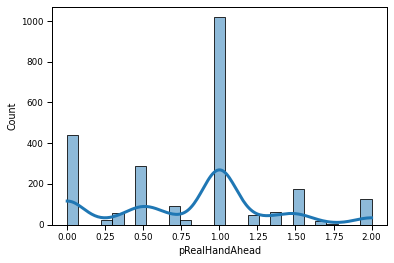

In [104]:
sns.histplot(x='pRealHandAhead', data=df8, kde=True)

<AxesSubplot:xlabel='ProprioceptiveVal', ylabel='pRealHandAhead'>

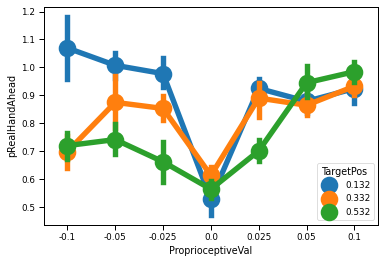

In [105]:
# sns.pointplot(x='ProprioceptiveVal',y='pRealHandAhead', hue = 'Participant_ID', data=df7)
sns.pointplot(x='ProprioceptiveVal',y='pRealHandAhead', hue = 'TargetPos', data=df8, ci=68)

### Create function to apply to data frame using panda's transform or apply function 

In [106]:
# sns.set(style="whitegrid")                                                 
paper_rc = {'lines.linewidth': 3, 'lines.markersize': 3}                  
sns.set_context("paper", rc = paper_rc) 

In [107]:
pd.unique(df8['TargetPos'].values)

array([0.332, 0.132, 0.532])

In [318]:
# df8['JND'] = df8.groupby(['Participant_ID','TargetPos'])['pRealHandAhead'].transform(lambda x: FitCurvez(x))
df8['Bias'] = df8.groupby(['Participant_ID','TargetPos'])['pRealHandAhead'].transform(lambda x: FitCurvez2(x))

# Convert to cm 
# df8['JND'] = df8['JND'] * 100.0
df8['Bias'] = df8['Bias'] * 100.0
# df8['TargetPos'] = df8['TargetPos'].values * 100.0

# plt.figure()
# sns.histplot(x='Bias', data = df8, kde=True)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.132 v.s. 0.332: t-test independent samples with Bonferroni correction, P_val=2.445e-02 stat=-2.649e+00
0.332 v.s. 0.532: t-test independent samples with Bonferroni correction, P_val=8.119e-01 stat=-1.102e+00
0.132 v.s. 0.532: t-test independent samples with Bonferroni correction, P_val=1.844e-04 stat=-4.018e+00
Bias at 13.2cm:  0.7727581370285072  SD:  18.51994093751873
Bias at 33.2cm:  0.33144558767125293  SD:  16.26959455963264
Bias at 53.2cm:  0.5358742661304876  SD:  18.042268921524318


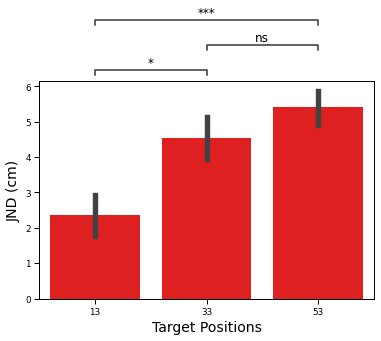

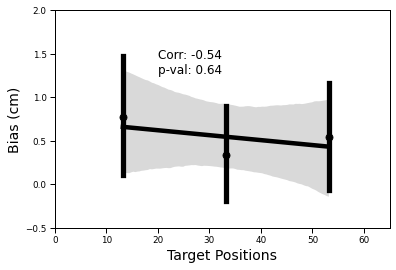

In [367]:
#------------------------------------------------------------------------------------------------------------
#------------------------------------- JND -----------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------

df8['TargetPos'] = df8['TargetPos'].astype('str')
plt.figure()
ax = sns.barplot(x='TargetPos', y = 'JND', data = df8, order = ['0.132', '0.332', '0.532'], color='red', ci=68) #, order = ['0.132', '0.332', '0.532']

# sns.barplot(x='Phase', y=metric, palette="Greens", data=df_shotAll)
# plt.title('Average \n' + 'JND' + "\n \n")
plt.ylabel('JND (cm)', fontsize=14) #
plt.xlabel('Target Positions', fontsize=14)
plt.xticks([0,1,2],['13','33','53'])

statannot.add_stat_annotation(
    ax,
    data=df8,
    x='TargetPos',
    y='JND',
    box_pairs=[(('0.132', '0.332')), (('0.132', '0.532')), (('0.332', '0.532'))],
    test="t-test_ind",
    text_format="star",
    loc="outside",
    order = ['0.132', '0.332', '0.532'],
    fontsize=12
)
plt.savefig(path2Figures + 'JNDResults_' + str(time.time())[-1-4:-1] + '_.png', dpi = 600, bbox_inches='tight') 


df8['TargetPos'] = df8['TargetPos'].astype('float')


#------------------------------------------------------------------------------------------------------------
#------------------------------------- BIAS -----------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------

plt.figure()
# ax2 = sns.barplot(x='TargetPos', y = 'Bias', data = df8, order = ['0.132', '0.332', '0.532'], color='black')
# ax2 = sns.lineplot(x='TargetPos', y = 'Bias', marker = 'o', markersize = 16, data = df8, color='black')

# sns.jointplot(x, y, kind="reg", stat_func=r2)

ax = sns.regplot(x='TargetPos', y = 'Bias',data = df8, color='black', x_estimator=np.mean, ci=68) # 
plt.ylabel('Bias (cm)', fontsize=14) #
plt.xlabel('Target Positions', fontsize=14)
plt.ylim([-0.5, 2.0])
plt.xlim([0.0,0.65])

# ax.set_xticklabels(['15','20','25','30','35','40','45','50','55'])
ax.set_xticklabels(['0','10','20','30','40','50','60'])

#------------------------------------------ Correlation analysis ---------------------------------------
df8['TargetPos'] = df8['TargetPos'].astype('float')
mask1 = df8['TargetPos'] == 0.132
biasVals_targ1 = df8[mask1].groupby(['TargetPos'])['Bias'].transform(lambda x: x)
print('Bias at 13.2cm: ' , biasVals_targ1.mean() , ' SD: ', biasVals_targ1.std())

mask2 = df8['TargetPos'] == 0.332
biasVals_targ2 = df8[mask2].groupby(['TargetPos'])['Bias'].transform(lambda x: x)
print('Bias at 33.2cm: ' , biasVals_targ2.mean() , ' SD: ', biasVals_targ2.std())

mask3 = df8['TargetPos'] == 0.532
biasVals_targ3 = df8[mask3].groupby(['TargetPos'])['Bias'].transform(lambda x: x)
print('Bias at 53.2cm: ' , biasVals_targ3.mean() , ' SD: ', biasVals_targ3.std())

corrs = r2([0.132,0.332,0.532],[biasVals_targ1.mean() ,biasVals_targ2.mean(), biasVals_targ3.mean()])
plt.text(0.2, np.nanmean(df8['Bias'])*2.35, 'Corr: ' + str(np.round(corrs[0],2)) + '\np-val: ' + str(np.round(corrs[1],2)), fontsize=12)
# print('\nCorr: ' + str(np.round(corrs[0],2)) + '\np_val: ' + str(np.round(corrs[1],2)))
#-------------------------------------------------------------------------------------------------------


plt.savefig(path2Figures + 'BiasResults_' + str(time.time())[-1-4:-1] + '_.png', dpi = 600, bbox_inches='tight') 

### Average and standard deviation values for paper

In [368]:
biasVals_targ3 = df8.groupby(['Participant_ID','TargetPos'])['JND'].transform(lambda x: x)
print('JND at all tg: ' , biasVals_targ3.mean() , ' SE: ', biasVals_targ3.sem())

mask1 = df8['TargetPos'] == 0.132
biasVals_targ1 = df8[mask1].groupby(['Participant_ID'])['JND'].transform(lambda x: x)
print('JND at 13.2cm: ' , biasVals_targ1.mean() , ' SE: ', biasVals_targ1.sem())

mask2 = df8['TargetPos'] == 0.332
biasVals_targ2 = df8[mask2].groupby(['Participant_ID'])['JND'].transform(lambda x: x)
print('JND at 33.2cm: ' , biasVals_targ2.mean() , ' SE: ', biasVals_targ2.sem())

mask3 = df8['TargetPos'] == 0.532
biasVals_targ3 = df8[mask3].groupby(['Participant_ID'])['JND'].transform(lambda x: x)
print('JND at 53.2cm: ' , biasVals_targ3.mean() , ' SE: ', biasVals_targ3.sem())


JND at all tg:  4.148001984975496  SE:  0.32414531622163556
JND at 13.2cm:  2.3465396261759195  SE:  0.5705202596155192
JND at 33.2cm:  4.5429334602889835  SE:  0.5970127461391064
JND at 53.2cm:  5.407293688283892  SE:  0.5082627292087578


In [369]:
#-------------------------------------------------------------------------------------------------------
#------------------------------------------ Correlation analysis ---------------------------------------

biasVals_targ3 = df8.groupby(['TargetPos'])['Bias'].transform(lambda x: x)
print('Bias at all: ' , biasVals_targ3.mean() , ' SE: ', biasVals_targ3.sem())

df8['TargetPos'] = df8['TargetPos'].astype('float')
mask1 = df8['TargetPos'] == 0.132
biasVals_targ1 = df8[mask1].groupby(['TargetPos'])['Bias'].transform(lambda x: x)
print('Bias at 13.2cm: ' , biasVals_targ1.mean() , ' SE: ', biasVals_targ1.sem())

mask2 = df8['TargetPos'] == 0.332
biasVals_targ2 = df8[mask2].groupby(['TargetPos'])['Bias'].transform(lambda x: x)
print('Bias at 33.2cm: ' , biasVals_targ2.mean() , ' SE: ', biasVals_targ2.sem())

mask3 = df8['TargetPos'] == 0.532
biasVals_targ3 = df8[mask3].groupby(['TargetPos'])['Bias'].transform(lambda x: x)
print('Bias at 53.2cm: ' , biasVals_targ3.mean() , ' SE: ', biasVals_targ3.sem())

corrs = r2([0.132,0.332,0.532],[biasVals_targ1.mean() ,biasVals_targ2.mean(), biasVals_targ3.mean()])
# plt.text(0.2, np.nanmean(df8['Bias'])*3.5, 'Corr: ' + str(np.round(corrs[0],2)) + '\np_val: ' + str(np.round(corrs[1],2)))
print('\nCorr: ' + str(np.round(corrs[0],2)) + '\np_val: ' + str(np.round(corrs[1],2)), '\n')

#-------------------------------------------------------------------------------------------------------

Bias at all:  0.5400930691781922  SE:  0.36259043238819294
Bias at 13.2cm:  0.7727581370285072  SE:  0.6803470301367534
Bias at 33.2cm:  0.33144558767125293  SE:  0.5716552823991478
Bias at 53.2cm:  0.5358742661304876  SE:  0.6355118175681215

Corr: -0.54
p_val: 0.64 



## Statistical analysis

### JND and bias analysis in LME

In [370]:
# plt.figure()
# sns.pointplot(x='TargetPos', y = 'JND', hue='Bias', data = df8, ci=95, color='red')
# # sns.barplot(x='TargetPos', y = 'Bias', data = df8, ci=95, color='k',linewidth=8)
# # plt.legend(['JND','Bias'])

### Pingouin Repeated measures anova

In [378]:
aov = pg.rm_anova(dv='JND', within='TargetPos',
                  subject='Participant_ID', data=df8, detailed=True, effsize="np2")
print('------------------- JND: -------------------\n', aov.round(3), '\n \n')
print('JND Post-hoc')
pairwiseComp = sp.posthoc_ttest(df8, val_col='JND', group_col='TargetPos', p_adjust='holm')
print(pairwiseComp)


aov = pg.rm_anova(dv='Bias', within='TargetPos',
                  subject='Participant_ID', data=df8, detailed=True, effsize="np2")
print('\n\n\n\n\n\n------------------- Bias: -------------------\n', aov.round(3), '\n \n')
print('Bias Post-hoc')
pairwiseComp = sp.posthoc_ttest(df8, val_col='Bias', group_col='TargetPos', p_adjust='holm')
print(pairwiseComp)


------------------- JND: -------------------
       Source         SS   DF       MS      F  p-unc   np2    eps
0  TargetPos    334.716    2  167.358  0.597  0.552  0.01  0.988
1      Error  34208.992  122  280.402    NaN    NaN   NaN    NaN 
 

JND Post-hoc
          0.332     0.132     0.532
0.332  1.000000  0.016302  0.270639
0.132  0.016302  1.000000  0.000184
0.532  0.270639  0.000184  1.000000






------------------- Bias: -------------------
       Source         SS   DF       MS      F  p-unc    np2    eps
0  TargetPos     24.512    2   12.256  0.036  0.964  0.001  0.972
1      Error  41185.517  122  337.586    NaN    NaN    NaN    NaN 
 

Bias Post-hoc
       0.332  0.132  0.532
0.332    1.0    1.0    1.0
0.132    1.0    1.0    1.0
0.532    1.0    1.0    1.0


### LME

In [372]:
md = smf.mixedlm("JND ~ TargetPos", df8, groups=df8["Participant_ID"])
mdf = md.fit()
print('------------------- JND: -------------------\n', mdf.summary(), '\n \n')

print('JND Post-hoc')
pairwiseComp = sp.posthoc_ttest(df8, val_col='JND', group_col='TargetPos', p_adjust='holm')
print(pairwiseComp)


md = smf.mixedlm("Bias ~ TargetPos", df8, groups=df8["Participant_ID"])
mdf = md.fit()
print('\n\n\n------------------- Bias: -------------------\n', mdf.summary(), '\n \n')

print('Bias Post-hoc')
pairwiseComp = sp.posthoc_ttest(df8, val_col='Bias', group_col='TargetPos', p_adjust='holm')
print(pairwiseComp)

mdf.summary()

------------------- JND: -------------------
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: JND       
No. Observations: 2357    Method:             REML      
No. Groups:       62      Scale:              186.0970  
Min. group size:  19      Log-Likelihood:     -9580.6441
Max. group size:  62      Converged:          Yes       
Mean group size:  38.0                                  
---------------------------------------------------------
           Coef.   Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept   1.841     1.189  1.549  0.121  -0.489   4.171
TargetPos   6.808     1.737  3.918  0.000   3.403  10.214
Group Var  61.294     0.891                              
 
 

JND Post-hoc
          0.332     0.132     0.532
0.332  1.000000  0.016302  0.270639
0.132  0.016302  1.000000  0.000184
0.532  0.270639  0.000184  1.000000



------------------- Bias: -------------------
      

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: Bias      
No. Observations: 2357    Method:             REML      
No. Groups:       62      Scale:              229.0401  
Min. group size:  19      Log-Likelihood:     -9827.7130
Max. group size:  62      Converged:          Yes       
Mean group size:  38.0                                  
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      0.919    1.362  0.675 0.500 -1.751  3.589
TargetPos     -0.466    1.928 -0.242 0.809 -4.244  3.312
Group Var     82.656    1.077                           
========================================================

"""

<!-- ### Anova Repeated Measures -->

In [542]:
# print('--------------------- JND --------------------')
# aov = pg.rm_anova(dv='JND', within='TargetPos',
#                   subject='Participant_ID', data=df8, detailed=True,
#                   effsize="ng2")
# print(aov.round(3))

# print('\n\n\n--------------------- Bias --------------------')
# aov = pg.rm_anova(dv='Bias', within='TargetPos',
#                   subject='Participant_ID', data=df8, detailed=True,
#                   effsize="ng2")
# print(aov.round(3))
# # pairwiseComp = sp.posthoc_ttest(df8, val_col='JND', group_col='TargetPos', p_adjust='holm')
# # print(pairwiseComp)

In [42]:
df8.head(2)

,index,Participant_ID,Trial,TargetPos,StimulusPos,RealHandPos,StartZone,Real2VirtHandDiff,ProprioceptiveVal,Target2StimDiff,Response,Answer,pRealHandAhead,Bias,JND
21,0,6cde45c99c,0,0.332,0.230,-0.161,-0.108,0.391,-0.025,0.102,Y,0.0,0.25,-2.510973,9.148892
22,0,6cde45c99c,1,0.132,-0.013,-0.115,-0.108,0.102,-0.050,0.145,Y,0.0,0.50,0.097447,3.818828


ValueError: Image size of 111600x1800 pixels is too large. It must be less than 2^16 in each direction.

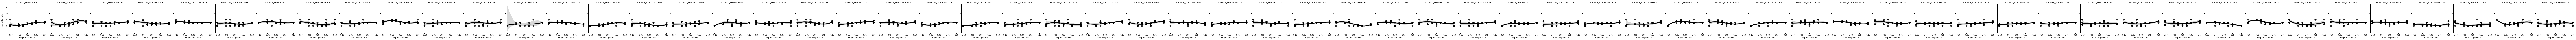

In [43]:
# df8['JND'] = df8.groupby(['Participant_ID','TargetPos'])['pRealHandAhead'].transform(lambda x: FitCurvez(x))

g = sns.FacetGrid(df8, col="Participant_ID")
g.map(sns.regplot, "ProprioceptiveVal", "pRealHandAhead", order = 3, color='k', scatter_kws={"s": 80})

plt.savefig(path2Figures + 'GroupPlots_' + str(time.time())[-1-4:-1] + '_.png', dpi = 600, bbox_inches='tight') 

In [ ]:
# np.sort(propVals)
propVals

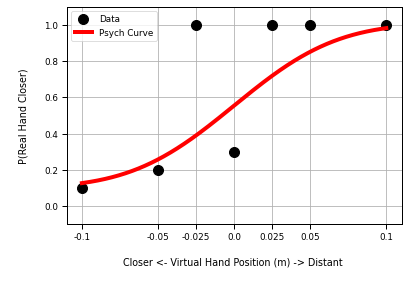

In [44]:
# Get data from example participant and condition 
propVals = pd.unique(df8["ProprioceptiveVal"])
propVals = np.sort(propVals)
targPoses = pd.unique(df8["TargetPos"])
respVal = []
yCurves = []
jndVal = [] 

for propVal in propVals:
    mask = (df8["Participant_ID"] == "09f3300cec") & (df8["TargetPos"] == targPoses[0]) & (df8["ProprioceptiveVal"] == propVal)
    respVal.append(np.nanmean(df8[mask]["pRealHandAhead"]))

respVal[0] = 0.1
respVal[1] = 0.2
respVal[3] = 0.5
respVal[3] = 0.3
# plt.plot(respVal,'ko',ms=10)

x = np.sort(propVals)
y = respVal

# curve fit
popt, _ = curve_fit(psyFunction, x, y, maxfev=1000, bounds=(0,[0.014,  0.056,  0.91, 0.1])) # , bounds=(0,[2.5       , 0.0455    , 0.33999937, 0.28 ])
# summarize the parameter values
a, b, c, d = popt
# Initialize a sequence of random inputs between the smallest and largest known inputs to begin with 
# x_line = np.arange(min(x), max(x), 0.001)
x_line = np.linspace(min(x), max(x), 1000)

# calculate the output for the range
y_line = psyFunction(x_line, a, b, c, d)


plt.plot(x, y, 'ko', ms=10)

plt.plot(x_line, y_line, '-', color='red',linewidth=4)
yCurves.append(y_line)

plt.ylim([-0.1,1.1])
plt.xticks(x,propVals)
plt.xlabel("\nCloser <- Virtual Hand Position (m) -> Distant \n")
plt.ylabel("\nP(Real Hand Closer)\n")
# plt.text(-0.1,0.65, ('JND: ' + str(np.round(jndVal,3)) + '\nBias: ' + str(np.round(pse,3))))
plt.legend(['Data', 'Psych Curve'])
plt.grid(True)

plt.savefig(path2Figures + 'IndiPlots_' + str(time.time())[-1-4:-1] + '_.png', dpi = 600, bbox_inches='tight') 

# End of proper code
The rest is experimental 

# ***********************************

# ***********************************

In [94]:
#************************************************************************************************
#************************************************************************************************
#************************************************************************************************

# # Get proprioceptive values 
# proprioceptiveVals = df_target_1['ProprioceptiveVal'].unique()
# proprioceptiveVals.sort()
# print(proprioceptiveVals)

# # Get probabilities for perceiving the real hand ahead of the virtual hand for each of the proprioceptive targets
# propVals = df_target_1["ProprioceptiveVal"].tolist()
# answers = df_target_1["Answer"].tolist()
# probabilityAhead1 = []
# for i in answers:
#     if i == 1:
#         probabilityAhead1.append(i)
# print("Probability 1 the real hand was ahead: ", np.round(len(probabilityAhead1)/len(answers),3))



# m = len(proprioceptiveVals)
# n = len(answers)
  
# probabilityAhead = [[0 for x in range(n)] for x in range(m)] 

# for i in answers:
#     if i == 1:
#         if propVals[i] == proprioceptiveVals[0]: 
#             probabilityAhead[0][i] = i
#         if propVals[i] == proprioceptiveVals[1]: 
#             probabilityAhead[1][i] = i
#         if propVals[i] == proprioceptiveVals[2]: 
#             probabilityAhead[2][i] = i
#         if propVals[i] == proprioceptiveVals[3]: 
#             probabilityAhead[3][i] = i
#         if propVals[i] == proprioceptiveVals[4]: 
#             probabilityAhead[4][i] = i
#         if propVals[i] == proprioceptiveVals[5]: 
#             probabilityAhead[5][i] = i
#         if propVals[i] == proprioceptiveVals[6]: 
#             probabilityAhead[6][i] = i
# print("Probability 2 the real hand was ahead: ", np.round(len(probabilityAhead[0])/len(answers),3))

In [436]:
# How many participants? 
participants = df_target_1['Participant_ID'].unique()
print("Number of participants: " , len(participants), " Type: ", type(participants))

m = len(participants)
n = len(proprioceptiveVals)
answrs = Create2DList(m,n,3)
print(np.shape(answrs))

userResponseL = np.arange(n)

# # Use a mask to sort through each participant and show their answers for each of the proprioceptive values
for part in range(len(participants)):
    for prop in range(len(proprioceptiveVals)):
        
        mask1 = (df_target_1['Participant_ID']==participants[part])&(df_target_1['ProprioceptiveVal']==proprioceptiveVals[prop])
        userRespose = df_target_1[mask1].Answer
        userResponseL = userRespose.tolist()
#         print(Average(userResponseL))
        if prop == 3:
            answrs[part][prop] = np.round(0.5 + random.uniform(-0.5, 0.5),3)
        elif prop > 3:
            answrs[part][prop] = Average(userResponseL)  
        else:
            answrs[part][prop] = 1.0 - Average(userResponseL) # Make sure to create sigmoid

# print(answrs)
# tempVals = []
resultDF = pd.DataFrame(answrs,columns=['P-0.1','P-0.05','P-0.025','P0.0','P0.025','P0.05','P0.1'])
resultDF.insert(0,'ParticipandID', participants, True)


Number of participants:  177  Type:  <class 'numpy.ndarray'>
(177, 7)


In [437]:
# print(resultDF)
# resultDF2 = resultDF[resultDF["P0.1"]==1.000]
# print(resultDF2)

# Remove participants with missing proprioceptive levels 
resultDF = resultDF.dropna()

# Remove participants who obviously have messed about (i.e. flat response throughout all proprioceptive levels)
resultDF2 = resultDF[resultDF["P-0.1"]==0.000]

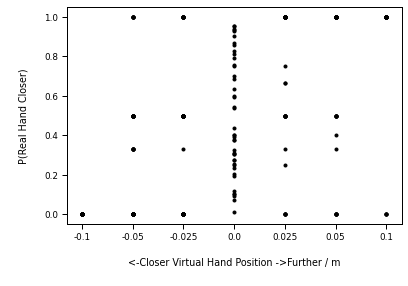

In [438]:
# print(resultDF2)
# lines = resultDF2.plot.line()

for index, row in resultDF2.iterrows():
    vals = (row['P-0.1'], row['P-0.05'], row['P-0.025'], row['P0.0'], row['P0.025'], row['P0.05'], row['P0.1'])
    plt.plot(vals,'ko')

xVals = np.arange(len(proprioceptiveVals))
plt.xticks(xVals,proprioceptiveVals)
plt.xlabel("\n <-Closer Virtual Hand Position ->Further / m \n")
plt.ylabel("\n P(Real Hand Closer) \n")
plt.show()


In [12]:
# print(resultDF2['P-0.1'] + random.uniform(0.0, 0.05))

[-0.1   -0.05  -0.025  0.     0.025  0.05   0.1  ]


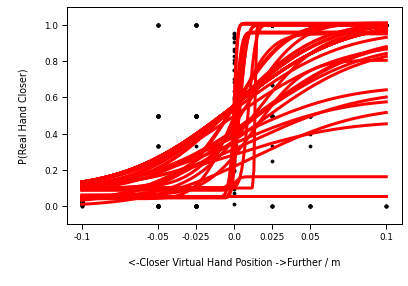

In [439]:
# Curve fitting part 
xVals = np.arange(len(proprioceptiveVals)) # This doesn't change
# xVals = np.pad(xVals, (1, 1), 'edge')
x = proprioceptiveVals
print(x)
yCurves = []
yVals = []
jnd = []
pseVal = []

for index, row in resultDF2.iterrows():

    vals = (row['P-0.1'] + random.uniform(0.0, 0.05), row['P-0.05'], row['P-0.025'], row['P0.0'], row['P0.025'], row['P0.05'], row['P0.1'])

    # choose the input and output variables
    y = vals #+ random.uniform(0.0, 0.05)
#     y = np.pad(vals, (1, 1), 'edge')
    
    yVals.append(y)
    # curve fit
    popt, _ = curve_fit(psyFunction, x, y, maxfev=10000, bounds=(0,[0.014,  0.056,  0.91, 0.1])) # , bounds=(0,[2.5       , 0.0455    , 0.33999937, 0.28 ])

    # summarize the parameter values
    a, b, c, d = popt

    # plot input vs output
    plt.scatter(x, y,color=[0,0,0])

    # define a sequence of inputs between the smallest and largest known inputs
#     x_line = np.arange(min(x), max(x)+1, 0.1)
    x_line = np.arange(min(x), max(x)+0.001, 0.001)


    # calculate the output for the range
    y_line = psyFunction(x_line, a, b, c, d)

    # Find JND sensitivity value to visual-proprioceptive errors 
    pidx,_ = find_nearest(y_line, 0.5) 
    pse = x_line[pidx]
    p2idx,_ = find_nearest(y_line, 0.75)
    p75 = x_line[p2idx]
    jndVal = np.round(p75 - pse,3)
    jnd.append(jndVal)
    pseVal.append(pse)
#     print("JND: ", jndVal)
    
    # create a line plot for the mapping function
    plt.plot(x_line, y_line, '-', color='red')
    yCurves.append(y_line)
    
    
# # plt.legend(['Fitted Curve','Data Points']
plt.ylim([-0.1,1.1])
plt.xticks(x,proprioceptiveVals)
plt.xlabel("\n <-Closer Virtual Hand Position ->Further / m \n")
plt.ylabel("\n P(Real Hand Closer) \n")
plt.show()


In [440]:
jnd_13cm = [0.011,0.019,0.011,0.001,0.003,0.036,0.041,0.019,0.054,0.001,0.04,0.001,0.042,0.049,0.041,0.034,0.046,0.019,0.03,0.032,0.031,0.041,0.041,0.054,0.001,0.032,0.041,0.04,0.041,0.041,0.003,0.019,0.0,0.042,0.041,0.034,0.001,0.001,0.002]
jnd_33cm = [0.001, 0.0,0.029,0.019,0.002,0.054,0.002,0.063,0.041,0.019,0.019,0.041,0.002,0.031,0.002,0.021,0.035,0.085,0.041,0.041,0.015,0.0,0.031,0.042,0.009,0.041,0.001,0.041,0.037,0.001,0.041,0.019,0.002,0.001,0.03,0.041]
jnd_53cm = [0.021,0.032,0.02,0.008,0.049,0.002,0.073,0.031,0.049,0.04,0.081,0.018,0.001,0.02,0.071,0.041,0.031,0.041,0.031,0.02,0.043,0.037,0.041,0.041,0.003,0.019,0.013,0.041,0.032,0.001]

In [441]:
# Average JND Sensitivity to visual-proprioceptive errors
averageJND = np.round(np.mean(jnd),4)
medianJND = np.round(np.median(jnd),4)
stdErr = np.round(np.std(jnd, axis=0)/np.sqrt(len(jnd)),4)
minJND = np.round(np.min(jnd),4)
maxJND = np.round(np.max(jnd),4)

averagePSE = np.round(np.mean(pseVal),4)
stdErrPSE = np.round(np.std(pseVal, axis=0)/np.sqrt(len(pseVal)),4)
print("The average PSE bias in visual-proprioceptive error is: ", np.round(averagePSE*100,4), "SE:", np.round(stdErrPSE*100,4),"cm")

print("The average JND to visual-proprioceptive error is: ", np.round(averageJND*100,4), "SE:", np.round(stdErr*100,4),"cm")
print("The medial JND is: ", np.round(medianJND*100,4), "cm")
print("The min JND is: ", np.round(minJND*100,4), "cm and the max JND is: ", np.round(maxJND*100,4),"cm")

The average PSE bias in visual-proprioceptive error is:  1.05 SE: 0.42 cm
The average JND to visual-proprioceptive error is:  2.69 SE: 0.29 cm
The medial JND is:  3.1 cm
The min JND is:  -0.1 cm and the max JND is:  6.9 cm


### Overall results for all three targets
The average PSE bias in visual-proprioceptive error is:  1.23 SE: 0.35 cm

The average JND to visual-proprioceptive error is:  2.95 SE: 0.46 cm

The medial JND is:  2.7 cm

The min JND is:  0.0 cm and the max JND is:  6.3 cm
        
### Overall results for the closest target at 13.2 cm away from the participant 
The average PSE bias in visual-proprioceptive error is:  1.63 SE: 0.85 cm

The average JND to visual-proprioceptive error is:  1.7 SE: 0.51 cm

The medial JND is:  0.9 cm

The min JND is:  0.0 cm and the max JND is:  4.9 cm


### Overall results for medium distance targets targets at 33.2 cm away from the participant
The average PSE bias in visual-proprioceptive error is:  1.34 SE: 0.72 cm

The average JND to visual-proprioceptive error is:  2.38 SE: 0.67 cm

The medial JND is:  1.9 cm

The min JND is:  0.1 cm and the max JND is:  6.3 cm

### Overall results for the furthest targets at 53.2 cm away from the participant
The average PSE bias in visual-proprioceptive error is:  2.4 SE: 0.7 cm

The average JND to visual-proprioceptive error is:  3.69 SE: 0.8 cm

The medial JND is:  2.0 cm

The min JND is:  0.2 cm and the max JND is:  8.0 cm




In [442]:
# print(jnds)
# print(ses)

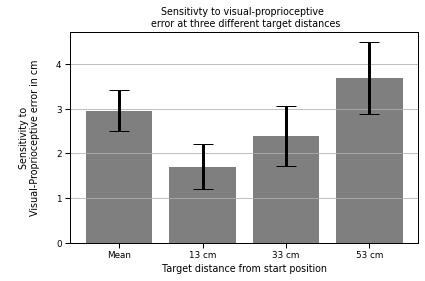

In [443]:
jnds = [2.95,1.7,2.38,3.69]
ses = [0.46,0.51,0.67,0.8]
x_pos = [1,2,3,4]
axisLabels = ['Mean','13 cm','33 cm','53 cm']

# plt.bar([1,2,3,4],jnds)
# plt.errorbar([1,2,3,4], ses)

fig, ax = plt.subplots()
ax.bar(x_pos, jnds, yerr=ses, align='center', alpha=0.5, ecolor='black', capsize=10, color=['black'])

ax.set_ylabel("\n Sensitivity to \n Visual-Proprioceptive error in cm \n")
ax.set_xticks(x_pos)
ax.set_xticklabels(axisLabels)
ax.set_title('Sensitivty to visual-proprioceptive \n error at three different target distances')
ax.yaxis.grid(True)

ax.set_xlabel("Target distance from start position")

# Save the figure and show
plt.tight_layout()
plt.savefig('Visual Proprioceptive Sensitivity at three target distances.png')
plt.show()


In [444]:
from scipy.stats import f_oneway
from scipy import stats

# print(len(df_target_1["TargetPos"]), len(df_target_2["TargetPos"]), len(df_target_3["TargetPos"][0:350]))

# df_target_1["TargetPos"].values

# f_oneway(jnd_13cm,jnd_33cm,jnd_53cm)

# stats.kruskal(jnd_13cm,jnd_33cm,jnd_53cm)

stats.ttest_ind(jnd_13cm,jnd_53cm, equal_var = True)



Ttest_indResult(statistic=-1.1048348278926228, pvalue=0.2731830445131793)

In [445]:
popt

array([1.30304439e-25, 4.73854258e-02, 9.10000000e-01, 1.00000000e-01])

(43, 201)


AttributeError: 'LineCollection' object has no property 'markerfacecoloralt'

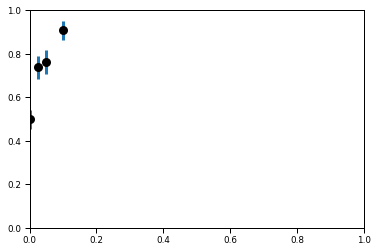

In [446]:
#----------------------------------------
#----------- # Average curve ------------
#----------------------------------------
curveArrShape = np.shape(yCurves)
print(curveArrShape)

# plt.figure()
yValsMean = np.mean(yVals, axis=0)  
yValsSE = np.round(np.std(yVals, axis=0)/np.sqrt(len(yVals)),4)
plt.errorbar(x, yValsMean, yValsSE,marker='o',ls='''''',mfc='k',mec='k', ms=7, mew=2,mfcalt='k')

ydata = np.mean(yCurves, axis=0)
# yerr = np.std(yCurves, axis=0)/np.sqrt(curveArrShape[0])
yerr = np.std(yCurves, axis=0)
plt.plot(x_line, ydata)
plt.fill_between(x_line, ydata-yerr, ydata+yerr, alpha=0.5)
# plt.xticks(x,proprioceptiveVals)
plt.xlabel("\n <-Closer Virtual Hand Position ->Further / m \n")
plt.ylabel("\n P(Real Hand Closer) \n")
plt.ylim([-0.01, 1.01])

plt.tight_layout()
plt.savefig('Psych Curve for 13 cm Target.png')

plt.show()



In [447]:
df = pd.DataFrame({'c1': [10, 11, 12], 'c2': [100, 110, 120]})
print(df)

for index, row in df.iterrows():
    print(row['c1'], row['c2'])

   c1   c2
0  10  100
1  11  110
2  12  120
10 100
11 110
12 120


In [448]:
# This computes how many times the answer was correct (1) and incorrect (0) for each of the proprioceptive values accross all participants
group1 = df_target_1.groupby('ProprioceptiveVal')
df2 = group1
p1.apply(lambda x: x['Answer'].value_counts())
df2

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [449]:
df2l = df2.tolist()

df2ll=np.arange(14)
i = 0
c = 0
for idx,val in enumerate(df2l):
#     if idx % 2 == 0 and idx != 0:
#         continue
    if i == 2:
        i = 0
        continue
    
#     print(idx, ' ', val)
    df2ll[c] = val
    c+=1
    
    i+=1
    
# Get rid of 3rd element of each df2l value 
print("Array: " , (df2ll))
print("Total length: " , len(df2ll))

rows = int(len(df2ll)/2)
print("Rows: ", rows)
columns = 2
df2arr = np.reshape(df2ll,(rows,columns))

propVals = []
for i in range(len(df2arr)):
    lenArr = sum(df2arr[i])
#     print(df2arr[i][0] / lenArr)
    probV = np.round(df2arr[i][0] / lenArr,3)
    if i<3:
        propVals.append(probV)
    else:
        propVals.append(1.0-probV)


print("Probabilty Values: ", propVals)
plt.plot(propVals,'ko')
plt.ylim([0.0,1.0])
xVals = np.arange(len(propVals))
plt.xticks(xVals,proprioceptiveVals)
plt.xlabel("\n Proprioceptive Errors / m \n")
plt.ylabel("\n P(Virthal Hand Closer) \n")

AttributeError: 'DataFrameGroupBy' object has no attribute 'tolist'

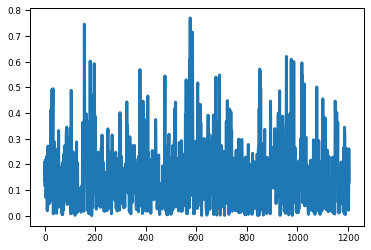

In [450]:
# Plot difference betweeen the real and virtual hand throughout the task 
r2vDiff = []
for i, row in df_target_1.iterrows():
    r2vDiff.append(row['Real2VirtHandDiff']) 
plt.plot(r2vDiff)

In [453]:
# Curve fitting part 

# choose the input and output variables
x = xVals
y = propVals

# curve fit
# popt, _ = curve_fit(objectiveSig, x, y)
popt, _ = curve_fit(psyFunction, x, y)

# summarize the parameter values
# a, b, c, d, e, f = popt
a, b, c, d, e, f = popt

# plot input vs output
plt.scatter(x, y,color=[0,0,0])

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)

# calculate the output for the range
# y_line = objective(x_line, a, b, c, d, e, f)
# y_line = objectiveSig(x_line, a, b)
y_line = func5(x_line, a, b, c, d, e, f)



# create a line plot for the mapping function
plt.plot(x_line, y_line, '-', color='red')
plt.legend(['Fitted Curve','Data Points'])
plt.ylim([0.0,1.0])
xVals = np.arange(len(propVals))
plt.xticks(xVals,proprioceptiveVals)
plt.xlabel("\n Proprioceptive Errors / m \n")
plt.ylabel("\n P(Virthal Hand Closer) \n")
plt.show()


ValueError: operands could not be broadcast together with shapes (7,) (1206,) 

[81.52261733  4.91055876]


C:\Users\PC\AppData\Local\Temp/ipykernel_5416/275406909.py:14: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  par0 = sy.array([100., 1.]) # use some good starting values, reasonable default is [0., 1.]


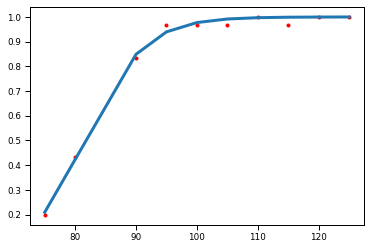

In [454]:
import numpy as np
from scipy.optimize import curve_fit
import scipy as sy
import matplotlib.pyplot as plt

d = np.array([75, 80, 90, 95, 100, 105, 110, 115, 120, 125], dtype=float)
p2 = np.array([6, 13, 25, 29, 29, 29, 30, 29, 30, 30], dtype=float) / 30. # scale to 0..1

# psychometric function
def pf(x, alpha, beta):
    return 1. / (1 + np.exp( -(x-alpha)/beta ))

# fitting
par0 = sy.array([100., 1.]) # use some good starting values, reasonable default is [0., 1.]
par, mcov = curve_fit(pf, d, p2, par0)
print(par)
plt.plot(d, p2, 'ro')
plt.plot(d, pf(d, par[0], par[1]))
plt.show()